# 竞争性关键词推荐

## 数据预处理
1. 从文档中读入搜索内容 --
    从比赛数据的训练集中提取出搜索记录，并以utf-8格式保存，每条记录占一行

In [15]:
#从源数据中提取出搜索词条，并保存（格式：每行一个搜索词条）
data = open("./user_tag_query.10W.TRAIN",'r',encoding='gb18030')
output_file = open("./raw_words.train",'w',encoding="utf-8")
for line in data:
    line_list = line.split('\t')
    line_list = line_list[4:]
    output_line = "\n".join(line_list)
    output_file.write(output_line + '\n')
data.close()
output_file.close()

ps：搜狗的数据集内容有点黄呀～～

2. 分词
    分词使用jieba分词工具

In [23]:
import jieba
#加载数据
train_data = open("./raw_words.train","r")
#保存结果文件
result_file = open("./cutted_words.train",'w')

for sentence in train_data:
    sentence = sentence[:-1]
    cut_word = jieba.cut(sentence)
    line_string = "\t".join(cut_word) + '\n'
    result_file.write(line_string)
train_data.close()
result_file.close()

3. 数据清洗（去除停用词）

In [2]:
#加载数据
train_data = open("./cutted_words.train","r")
#保存结果文件
result_file = open("./linkfree_words.train",'w')

#去除链接类词条
for line in train_data:
    word_list = line.split('\t')
    if word_list[0] in ['http','https','ftp','http:']:
        continue
    line_string = "\t".join(word_list) + '\n'
    result_file.write(line_string)
train_data.close()
result_file.close()

在去除停用词之前，首先获取词频分布特征

In [33]:
#读入数据，以一维列表形式
def read_word_list(filename):
    wordlist = [];
    data_file = open(filename,'r')
    for line in data_file:
        line = line[:-1]
        words = line.split('\t')
        wordlist.extend(words)
    data_file.close()
    return wordlist

In [34]:
#统计词频并展示(需要空闲5G左右内存)
from collections import Counter
word_list = read_word_list('./cleandata_v3.train')
count_result = Counter(word_list)
for key, val in count_result.most_common(10):
    print(key, val)

图片 291072
手机 191472
多少 191411
意思 190856
小说 159799
视频 157487
2016 144241
下载 134929
大全 131463
吃 128020


In [35]:
#持久化统计结果
word_list = None
result_file = open('./count_record_v3.txt','w')
for key ,val in count_result.items():
    result_file.write(key + "\t" + str(val) + "\n")
result_file.close()
    

In [10]:
#停用词过滤器

#"的", "了", "在", "是", "我", "有", "和", "就",
#"不", "人", "都", "一", "一个", "上", "也", "很", "到", "说", "要", "去", "你",
#"会", "着", "没有", "看", "好", "自己", "这"
def stop_words_filter(word_list):
    stop_word_list = set(['\n','\t','\r',',','，','/','.',', ','之','多少','可以','的','与','了', "在",'是',"我","和","就","不","都","一", "一个","上", "也", "很", "到", "说","要", "去", "你","会", "着", "没有", "看", "好","自己", "这",'呢','怎样','如何','什么','',' ','怎么','吗','有'])
    word_cleaned = []
    for word in word_list:
        if word not in stop_word_list:
            word_cleaned.append(word)
    return word_cleaned
stop_words_filter([])

[]

In [32]:
#加载数据
train_data = open("./cutted_words.train","r")
#保存结果文件
result_file = open("./cleandata_v3.train",'w')

#过滤分词结果中的停用词
for line in train_data:
    line = line[:-1]
    word_list = line.split('\t')
    word_list = stop_words_filter(word_list)
    if len(word_list) == 0:
        continue
    line_string = "\t".join(word_list) + '\n'
    result_file.write(line_string)
train_data.close()
result_file.close()


In [15]:
result_file = open("./cleandata_v1.train",'r')
for i in range(10):
    line = result_file.readline()
    if (line == "\n"):
        continue
    print(line)
result_file.close()

柔和	双沟	

女生	



In [23]:
word_list = None

In [24]:
count_result = None

In [7]:
train_data = open("./raw_words.train","r")
line = train_data.readline()
train_data.close()

In [8]:
print(line)

柔和双沟



In [9]:
print(line[-1])

In [20]:
import jieba as jieba
line = "柔和双沟\n"
# line = line[:-1]
words = jieba.cut(line)

In [21]:
"\t".join(words)

'柔和\t双沟\t\n'

In [15]:
print(words)

<generator object Tokenizer.cut at 0x7f813df26138>


In [3]:
from pymongo import MongoClient
conn = MongoClient('127.0.0.1',27017)
testdb = conn.test
words = testdb.words
for word in words.find():
    print(word)

{'_id': ObjectId('5c98bc5e88e7313cd7d1d18f'), 'x': '这是一个测试'}


In [4]:
words.remove()

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: remove is deprecated. Use delete_one or delete_many instead.
  """Entry point for launching an IPython kernel.


{'n': 1, 'ok': 1.0}

In [9]:
for word in words.find():
    print(word)

In [11]:
#加载数据
train_data = open("./cutted_words.train","r")
#保存结果文件

#过滤分词结果中的停用词
for line in train_data:
    line = line[:-1]
    word_list = line.split('\t')
    word_list = stop_words_filter(word_list)
    if len(word_list) == 0:
        continue
    words.insert({"item":word_list})
train_data.close()


/usr/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  if sys.path[0] == '':


至此，数据分词入库完成，接下来先实现通用数据访问接口

## 数据访问接口的实现

In [1]:
from pymongo import MongoClient
from bson import Code
#创建连接
_conn = MongoClient('127.0.0.1',27017)
#连接到test数据库
_testdb = _conn.test
#获取words文档句柄
_words = _testdb.words
#获取词频统计文档句柄
_wordCount = _testdb.wordcount
_countGraph = _testdb.countgraph

##词频统计mapreduce版
def countWords(data,out = {"inline":1}):
    mapper = Code("""
        function() {
            this.item.forEach(function(v) {
                emit(v,1)
            })
        }
    """)
    reducer = Code("""
        function(key,values) {
            var total = 0
            for (var i = 0; i < values.length; i++){
                total += values[i];
            }
            return total
        }
    """)
    return data.map_reduce(mapper,reducer,out)

##词频统计aggragate版
def countAllWords():
    countPipeline = [
        {
            "$unwind":"$item"
        },
        {
            "$group":{"_id":"$item","count":{"$sum":1}}
        },
        {
            "$sort":{"count":-1}
        },
        {
            "$out":"wordcount"
        }
    ]
    _words.aggregate(countPipeline,allowDiskUse=true)
    return

##得到全局词频统计结果
def getWordCount(word):
    result = _wordCount.find_one({"_id":word})
    return result["count"]
##获取词频分布结果
def wordCountGraph():
    pipeline = [
        {
            "$group":{"_id":"$count","sum":{"$sum":1}}
        },
        {
            "$sort":{"_id":1}
        },
        {
            "$out":"countgraph"
        }
    ]
    _wordCount.aggregate(pipeline,allowDiskUse=True)
    return


def getCountGraphData():
    return list(_countGraph.find({}))

##关联关键词统计aggragate版
def getIK(words,minvolume):
    IKPipeline = [
        {"$match":{"item":{"$all":words}}},
        {"$unwind":"$item"},
        {"$group":{"_id":"$item","count":{"$sum":1}}},
        {"$match":{"count":{"$gt":minvolume}}},
        {"$sort":{"count":-1}}
    ]
    result = {record["_id"]:record["count"] for record in _words.aggregate(IKPipeline)}
    result.pop(words[0])
    return result
##获取两个关键词同时出现的搜索量
def getVolume(seed,keyword):
    countPipeline = [
        {"$match":{"item":{"$all":[seed,keyword]}}},
        {"$group":{"_id":"null","count":{"$sum":1}}}
    ]
    result = list(_words.aggregate(countPipeline))
    return result[0]["count"]

def getVolume(seed,keyword):
    return _words.count_documents({"item":{"$all":[seed,keyword]}})
## 获取指定offset和limit的文档集合
def getWordsBySize(offset_num,limit_num):
    return _words.find().limit(limit_num).skip(offset_num)


In [48]:
wordCountGraph()

In [49]:
l =getCountGraphData()

In [50]:
print(l[:1])

[{'_id': 1.0, 'sum': 481409}]


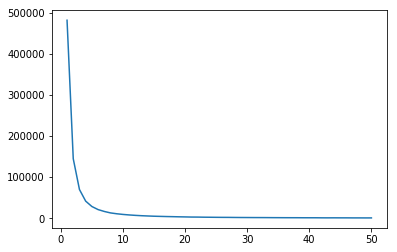

In [51]:
##
from matplotlib import pyplot
x = [a["_id"] for a in l]
y = [a["sum"] for a in l]
pyplot.plot(x[:50],y[:50])
# print(x[1],y[1])

In [43]:
print(x[50],y[50])

52.0 750


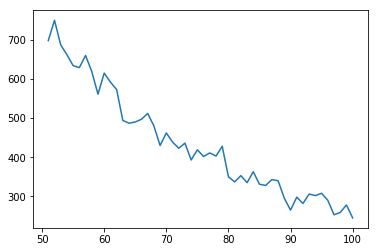

In [52]:
pyplot.plot(x[50:100],y[50:100])

In [45]:
print(x[100],y[100])

97.0 253


In [60]:
print(x[99],y[99])
print(len(x))

100.0 245
4719


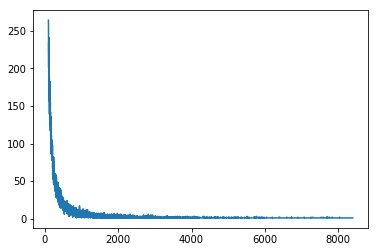

In [61]:
pyplot.plot(x[100:4000],y[100:4000])

``` javascript
    function(){
        var test = 0
        return 0
    }
```

In [11]:
resu = getIK(["pan"],10)
print(resu)

{':': 2495, 'baidu': 2355, 'com': 2224, 's': 2092, 'http': 1631, 'https': 139, '链接': 71, '百度': 49, 'share': 48, '(': 45, '1gd1dozp': 44, '密码': 42, '?': 37, 'link': 35, '"': 35, 'co': 28, '=': 27, 'panhttp': 22, 'ht': 21, 'mbox': 20, '[': 20, 'tp': 20, 'ttp': 20, '密': 19, 'bai': 18, 'p': 18, ')': 17, 'htt': 17, ']': 16, '1o8ky59c': 15, '_': 14, '：': 14, 'baid': 14, 'wap': 14, '1bpjxdgb': 14, '#': 14, '云': 12, 'href': 11, '1i5ctmyt': 11, 'b': 11, 'baiduhttp': 11, 'c': 11, 'target': 11}


In [37]:
c = getVolume("云","pan")

In [38]:
print(resu)

12


In [34]:
print(resu)

[':', 'baidu', 'com', 's', 'http', 'https', '链接', '百度', 'share', '(', '1gd1dozp', '密码', '?', 'link', '"', 'co', '=', 'panhttp', 'ht', 'mbox', '[', 'tp', 'ttp', '密', 'bai', 'p', ')', 'htt', ']', '1o8ky59c', '_', '：', 'baid', 'wap', '1bpjxdgb', '#', '云', 'href', '1i5ctmyt', 'b', 'baiduhttp', 'c', 'target']


In [29]:
getWordCount("华为")

28218

## 计算comp

In [22]:
def comp(keyword,seed):
    ik_set = getIK([seed],10)
    ik_set.pop(keyword,0)
    s = getWordCount(seed)
    comp_sum = 0
    for ik in ik_set:
        a = getWordCount(ik)
        ka = getVolume(keyword,ik)
        if a - ik_set[ik]:
            comp_sum += (ik_set[ik] *ka) / (s * (a - ik_set[ik]))
    return comp_sum

In [10]:
##使用聚合优化
def comp(keyword,seed):
    ik_set = getIK([seed],10)
    ik_set.pop(keyword,0)
    ka_set = getIK([keyword],10)
    ka_set.pop(seed,0)
    target_set = set(ik_set.keys()) & set(ka_set.keys())
    s = getWordCount(seed)
    comp_sum = 0
    for it in target_set:
        a = getWordCount(it)
        if a - ik_set[it]:
            comp_sum += (ik_set[it] *ka_set[it]) / (s * (a - ik_set[it]))
    return comp_sum
## 使用mapreduce优化comp
# def comp(keyword,seed):
    

In [23]:
print(comp("小米","华为"))

print(comp("小米","华为"))

##参数为10
print(comp("小米","华为"))

##参数为100
print(comp("小米","华为"))

print(comp("手机","华为"))

print(comp("手机","华为"))

print(comp("宝马","华为"))

print(comp("宝马","华为"))

print(comp("宝马","奔驰"))

print(comp("宝马","奔驰"))

print(comp("宝马","奔驰"))

print(comp("汽车","宝马"))

print(comp("汽车","宝马"))

print(comp("汽车","宝马"))

print(comp("奔驰","宝马"))

0.05554324612465046


In [62]:
print("遍历一遍计算竞争性需要",992243 * 10 /3600.0,"小时")

遍历一遍计算竞争性需要 2756.2305555555554 小时


#### 可以看出，这是一个不可能完成的任务。为了找到竞争性关键词，必须要做优化。

    主要思路从一下几个方面入手
1. 查询缓存
2. 启发式搜索

In [11]:
##启发式搜索推荐关键词
import time
def getCommendWord(seed):
    ik_set = getIK([seed],100)
    target_set = set()
    result = {}
    for ik in ik_set:
        target = getIK([ik],100)
        target_set = target_set.union(target.keys())
    print("the target_set ",len(target_set))
    target_set.discard(seed)
    for target in target_set:
        result[target] = comp(target,seed)
    r = sorted(result.items(),key=lambda x:x[1],reverse=True)
    return r
start_time = time.time()
rtest = getCommendWord("小米")
end_time = time.time()
print("time cost ",end_time - start_time)
print(rtest[:30])

the target_set  4382
time cost  847.9869685173035
[('手机', 0.15250700875994275), ('版', 0.08020815375056756), ('红米', 0.061547644576260926), ('苹果', 0.06097146704331279), ('华为', 0.050347849047701294), ('用', 0.04543681493698568), ('电脑', 0.04343012528258427), ('qq', 0.03890502142678254), ('下载', 0.0385222064034216), ('荣耀', 0.03674779742225897), ('平板', 0.03529869088685101), ('为什么', 0.03384084106062776), ('5', 0.03205344346543692), ('2', 0.031920181169499684), ('设置', 0.031080523255230953), ('能', 0.030651947554283156), ('怎么办', 0.02913315554927894), ('魅蓝', 0.028410670758789815), ('钱', 0.02715429220538966), ('充电', 0.025991855966879807), ('哪个', 0.024127644483015947), ('软件', 0.023738795013055886), ('视频', 0.023446953060851605), ('三星', 0.023113391661230352), ('?', 0.021477910404636827), ('月', 0.02124389538406593), ('魅族', 0.02072834234706666), ('图片', 0.020465085752337086), ('密码', 0.019967449830500535), ('百度', 0.019651577219701507)]


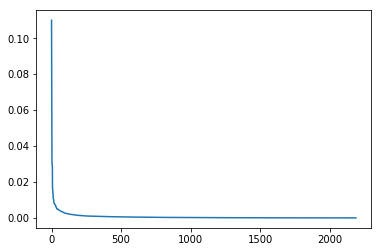

In [28]:
from matplotlib import pyplot

x = range(len(rtest))
y = [r[1] for r in rtest]
pyplot.plot(x,y)

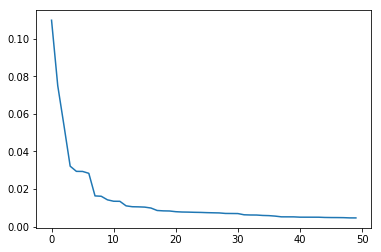

In [30]:
pyplot.plot(x[:50],y[:50])

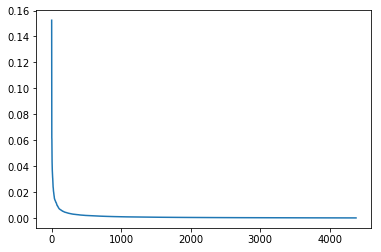

In [34]:
xx = range(len(rtest))
yy = [r[1] for r in rtest]
pyplot.plot(xx,yy)

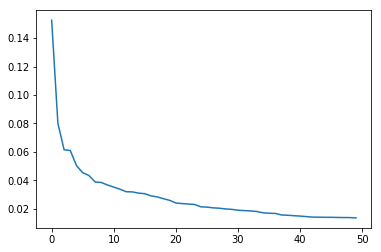

In [35]:
pyplot.plot(xx[:50],yy[:50])

In [16]:
print(len(rtest))

4626


In [7]:
comp("三星","红米")

0.13069223992160317

In [3]:
##使用聚合优化
def comp_debug(keyword,seed):
    ik_set = getIK([seed],10)
    ik_set.pop(keyword,0)
    ka_set = getIK([keyword],10)
    ka_set.pop(seed,0)
    target_set = set(ik_set.keys()) & set(ka_set.keys())
    s = getWordCount(seed)
    comp_sum = 0
    sum_list = []
    for it in target_set:
        a = getWordCount(it)
        if a - ik_set[it]:
            t = (ik_set[it] *ka_set[it]) / (s * (a - ik_set[it]))
            sum_list.append(t)
            comp_sum += t
    print(comp_sum)
    return sum_list

In [4]:
rd = comp_debug("红米","三星")

0.03116528635318626


In [5]:
rd2 = comp_debug("三星","红米")

0.13069223992160325


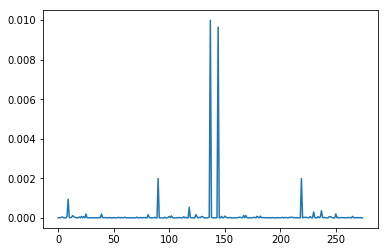

In [6]:
from matplotlib import pyplot
xx = range(len(rd))
pyplot.plot(xx,rd)

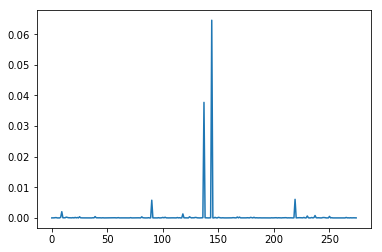

In [7]:
xx = range(len(rd2))
pyplot.plot(xx,rd2)

In [8]:
rdsort = sorted(rd,reverse=True)
rd2sort = sorted(rd2,reverse=True)

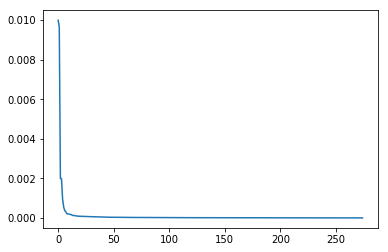

In [9]:
xx = range(len(rd))
pyplot.plot(xx,rdsort)

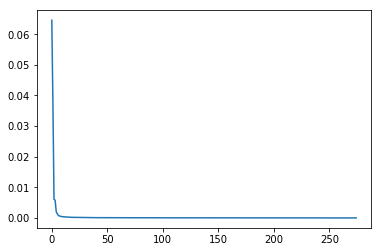

In [10]:
xx = range(len(rd2))
pyplot.plot(xx,rd2sort)

0.00012418120851929212


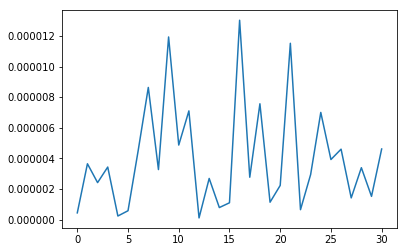

In [12]:
rd3 = comp_debug("玉米","红米")
xx = range(len(rd3))
pyplot.plot(xx,rd3)

0.0003483679274924368


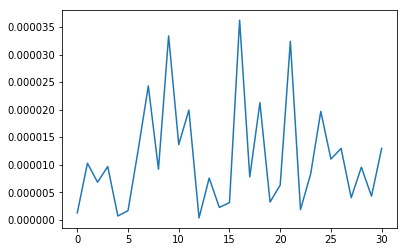

In [13]:
rd3 = comp_debug("红米","玉米")
xx = range(len(rd3))
pyplot.plot(xx,rd3)

0.050103711856761476


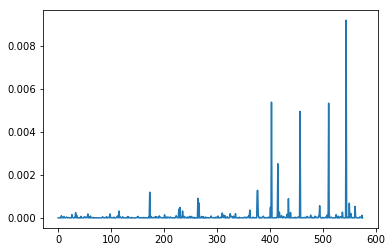

In [14]:
rd4 = comp_debug("华为","苹果")
xx = range(len(rd4))
pyplot.plot(xx,rd4)

0.0836096631731142


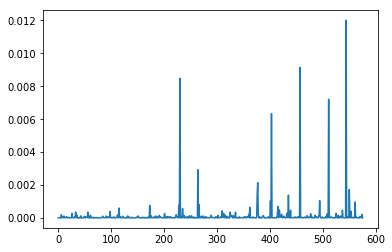

In [15]:
rd4 = comp_debug("苹果","华为")
xx = range(len(rd4))
pyplot.plot(xx,rd4)

In [8]:
##多进程优化推荐关键词
import multiprocessing
import time

def comp_multi(keyword,seed):
    ik_set = getIK([seed],10)
    ik_set.pop(keyword,0)
    ka_set = getIK([keyword],10)
    ka_set.pop(seed,0)
    target_set = set(ik_set.keys()) & set(ka_set.keys())
    s = getWordCount(seed)
    comp_sum = 0
    for it in target_set:
        a = getWordCount(it)
        if a - ik_set[it]:
            comp_sum += (ik_set[it] *ka_set[it]) / (s * (a - ik_set[it]))
    return (keyword,comp_sum)


def getCommendWord(seed):
    pool = multiprocessing.Pool(processes=4)
    ik_set = getIK([seed],100)
    target_set = set()
    result = {}
    for ik in ik_set:
        target = getIK([ik],100)
        target_set = target_set.union(target.keys())
    print("the target_set ",len(target_set))
    target_set.discard(seed)
    result = []
    for target in target_set:
        result.append(pool.apply_async(comp_multi, (target,seed)))
    pool.close()
    pool.join()
    result = [r.get() for r in result]
    r = sorted(result,key=lambda x:x[1],reverse=True)
    return r
start_time = time.time()
rtest = getCommendWord("小米")
end_time = time.time()
print("time cost ",end_time - start_time)
print(rtest[:30])

/usr/lib/python3.7/site-packages/pymongo/topology.py:149: UserWarning: MongoClient opened before fork. Create MongoClient only after forking. See PyMongo's documentation for details: http://api.mongodb.org/python/current/faq.html#is-pymongo-fork-safe
  "MongoClient opened before fork. Create MongoClient only "
/usr/lib/python3.7/site-packages/pymongo/topology.py:149: UserWarning: MongoClient opened before fork. Create MongoClient only after forking. See PyMongo's documentation for details: http://api.mongodb.org/python/current/faq.html#is-pymongo-fork-safe
  "MongoClient opened before fork. Create MongoClient only "
/usr/lib/python3.7/site-packages/pymongo/topology.py:149: UserWarning: MongoClient opened before fork. Create MongoClient only after forking. See PyMongo's documentation for details: http://api.mongodb.org/python/current/faq.html#is-pymongo-fork-safe
  "MongoClient opened before fork. Create MongoClient only "
/usr/lib/python3.7/site-packages/pymongo/topology.py:149: UserWa

the target_set  4382
[('手机', 0.15250700875994286), ('版', 0.08020815375056756), ('红米', 0.061547644576260975), ('苹果', 0.06097146704331276), ('华为', 0.05034784904770133), ('用', 0.045436814936985676), ('电脑', 0.04343012528258421), ('qq', 0.03890502142678248), ('下载', 0.038522206403421605), ('荣耀', 0.03674779742225898), ('平板', 0.03529869088685102), ('为什么', 0.033840841060627735), ('5', 0.03205344346543691), ('2', 0.03192018116949972), ('设置', 0.031080523255230936), ('能', 0.030651947554283146), ('怎么办', 0.02913315554927894), ('魅蓝', 0.028410670758789804), ('钱', 0.027154292205389646), ('充电', 0.025991855966879796), ('哪个', 0.024127644483015933), ('软件', 0.023738795013055904), ('视频', 0.02344695306085158), ('三星', 0.023113391661230373), ('?', 0.021477910404636806), ('月', 0.021243895384065938), ('魅族', 0.020728342347066685), ('图片', 0.020465085752337086), ('密码', 0.01996744983050052), ('百度', 0.019651577219701517)]


In [8]:
## 多线程优化
from multiprocessing.pool import ThreadPool
import time
##使用聚合优化
def comp(keyword,seed,result_set):
    ik_set = getIK([seed],10)
    ik_set.pop(keyword,0)
    ka_set = getIK([keyword],10)
    ka_set.pop(seed,0)
    target_set = set(ik_set.keys()) & set(ka_set.keys())
    s = getWordCount(seed)
    comp_sum = 0
    for it in target_set:
        a = getWordCount(it)
        if a - ik_set[it]:
            comp_sum += (ik_set[it] *ka_set[it]) / (s * (a - ik_set[it]))
    result_set[target] = comp_sum
    return

##启发式搜索推荐关键词
def getCommendWord(seed):
    ik_set = getIK([seed],100)
    target_set = set()
    result = {}
    for ik in ik_set:
        target = getIK([ik],100)
        target_set = target_set.union(target.keys())
    print("the target_set ",len(target_set))
    target_set.discard(seed)
#     def compute_comp(target,seed):
#         result[target] = comp(target,seed)
#         return
    pool = ThreadPool(8)
    for target in target_set:
        pool.apply_async(comp, args=(target, seed, result))
    pool.close()
    pool.join()
    r = sorted(result.items(),key=lambda x:x[1],reverse=True)
    return r

start_time = time.time()
rtest = getCommendWord("小米")
end_time = time.time()
print("time cost ",end_time - start_time)
print(rtest[:30])

the target_set  4382
time cost  374.2187657356262
[]


多线程优化的加速比大于2,。。。。通过对查询日志的查看，发现重复的查询占很大一部分，可以考虑加入查询缓存

In [18]:
ik_set = getIK(["华为"],100)
rclear = []
for r in rtest:
    if r[0] in ik_set:
        continue
    rclear.append(r)
rclear_sort = sorted(rclear,key=lambda x:x[1],reverse=True)
print(rclear_sort[:30])

[('王者', 0.17996450866253363), ('月', 0.024001183722026087), ('qq', 0.023928228277762798), ('2', 0.019584976793983442), ('vivo', 0.018799352478780396), ('评测', 0.016972624631200254), ('3', 0.016489189209720295), ('英雄', 0.015847226473396408), ('游戏', 0.014764362038829425), ('买', 0.01439840222083899), ('年', 0.014129533207268603), ('x7', 0.013157578220786828), ('分', 0.013046007263062806), ('指纹', 0.01303217672771124), ('意思', 0.012843018047336069), ('电池', 0.012821825113046385), ('跑', 0.012706202865521305), ('双卡', 0.012590178881455322), ('那个', 0.012237260419887333), ('后', 0.01208809017164699), ('nfc', 0.011817286528951507), ('配置', 0.011572707492844735), ('1', 0.011512210144499472), ('微信', 0.01143285854063806), ('把', 0.01135746106110409), ('流量', 0.01122717831464687), ('红米', 0.011199528092428666), ('壁纸', 0.011187402813466583), ('开', 0.011101674893205895), ('换', 0.010520781723554468)]


In [21]:
output_file = open("compkey_huawei.txt",'w')
for item in rtest:
    output_file.write(item[0] + "\t" + str(item[1]) + "\n")
output_file.close()